### Reducción de dimensionalidad
Supongamos que tenemos datos con muchas variables numéricas y queremos reducir su dimensionalidad mientras preservamos la mayor cantidad posible de la variabilidad original.

In [2]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

1. **Generación de datos simulados**:
   - Creamos cuatro variables: tres de ellas (`x1`, `x2`, `x3`) están correlacionadas, mientras que la cuarta (`x4`) es independiente.
   - Esto refleja un problema real donde algunas variables aportan información redundante.

In [3]:
# Paso 1: Crear datos simulados
np.random.seed(42)
n_samples = 200

In [4]:
# Variables altamente correlacionadas
x1 = np.random.normal(50, 10, n_samples)
x2 = x1 + np.random.normal(0, 5, n_samples)
x3 = 2 * x1 + np.random.normal(0, 8, n_samples)
x4 = np.random.normal(60, 15, n_samples)  # Variable independiente

# Crear un DataFrame
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4})

In [5]:
data.head()

,x1,x2,x3,x4
0,54.967142,56.756078,97.178862,71.354829
1,48.617357,51.421280,92.439714,46.167520
2,56.476885,61.892142,112.995720,73.044089
3,65.230299,70.499309,130.836442,80.334568
4,47.658466,40.770119,91.716409,66.201524


2. **Estandarización**:
   - Es importante estandarizar los datos antes de aplicar PCA, ya que esta técnica es sensible a las escalas de las variables.
   - Utilizamos `StandardScaler` para transformar las variables para que tengan media 0 y desviación estándar 1.

In [6]:
# Paso 2: Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

3. **Aplicar PCA**:
   - Usamos `PCA` de `sklearn` para descomponer la matriz de datos en componentes principales.
   - Cada componente principal es una combinación lineal de las variables originales.

In [7]:
# Paso 3: Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [8]:
# Transformar los datos al nuevo espacio PCA
data_pca = pca.transform(data_scaled)

4. **Resultados del PCA**:
   - `explained_variance_ratio`: Indica cuánta varianza explica cada componente.
   - `components_`: Contiene los pesos o coeficientes que relacionan las variables originales con los componentes principales.

In [13]:
# Paso 4: Análisis de los resultados
# a) Proporción de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio
print("Proporción de varianza explicada por cada componente:")
for i, var in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {var:.4f}")

# b) Cargar los componentes principales
components = pd.DataFrame(pca.components_, columns=data.columns)
components.head()

Proporción de varianza explicada por cada componente:
Componente 1: 0.6880
Componente 2: 0.2499
Componente 3: 0.0459
Componente 4: 0.0162


,x1,x2,x3,x4
0,0.589418,0.566332,0.572912,0.060221
1,-0.031499,-0.095853,0.022608,0.994640
2,-0.070568,0.738031,-0.665786,0.084022
3,0.804123,-0.354105,-0.477484,0.002194


5. **Visualización**:
   - Mostramos la proporción acumulada de varianza explicada para identificar cuántos componentes son suficientes para representar los datos.
   - Generalmente, seleccionamos componentes que expliquen al menos el 85-90% de la varianza.

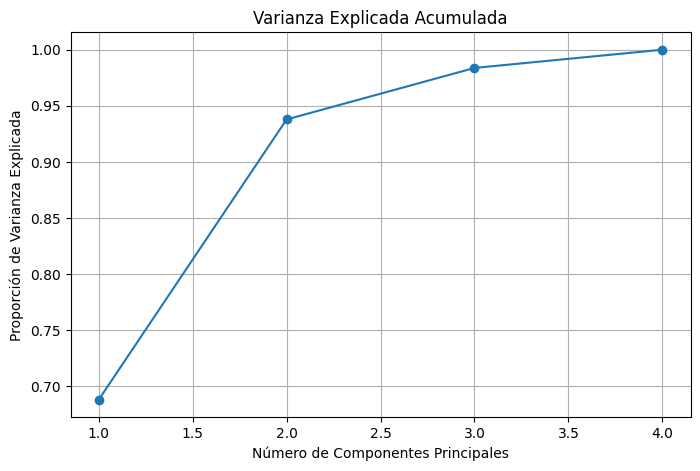

In [10]:
# Paso 5: Visualización de los resultados
# Gráfico de varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    np.cumsum(explained_variance_ratio),
    marker='o'
)
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid()
plt.show()

El gráfico de la varianza explicada acumulada muestra que **dos componentes principales son suficientes para explicar casi el 94% de la varianza total**. Esto implica que podemos reducir las dimensiones de los datos de cuatro a dos sin perder mucha información.

6. **Interpretación**:
   - Imprimimos los pesos de cada variable en cada componente para entender qué variables contribuyen más.
   - También transformamos los datos originales al nuevo espacio definido por los componentes principales.

In [11]:
# Paso 6: Interpretación de los resultados
print("Proporción de varianza explicada por cada componente:")
print(explained_variance_ratio)

print("\nCargar los componentes principales (matriz de pesos):")
print(components)

Proporción de varianza explicada por cada componente:
[0.68800081 0.24985195 0.04590499 0.01624225]

Cargar los componentes principales (matriz de pesos):
         x1        x2        x3        x4
0  0.589418  0.566332  0.572912  0.060221
1 -0.031499 -0.095853  0.022608  0.994640
2 -0.070568  0.738031 -0.665786  0.084022
3  0.804123 -0.354105 -0.477484  0.002194



- **PC1**: Las variables `x1`, `x2` y `x3` tienen pesos altos y similares (~0.57), lo que indica que este componente representa una combinación lineal de estas variables, que están altamente correlacionadas.
- **PC2**: Tiene un peso dominante en `x4` (0.9946). Esto confirma que `x4` es una variable independiente y aporta información única.
- **PC3**: Diferencia principalmente entre `x2` y `x3`, con pesos opuestos (0.738 y -0.665, respectivamente), lo que indica una relación inversa entre estas variables.
- **PC4**: Tiene una fuerte asociación con `x1` (0.804), pero su varianza explicada es mínima.

In [12]:
# Crear un DataFrame con las nuevas variables
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(len(data.columns))])

print("\nPrimeras 5 observaciones transformadas:")
print(data_pca_df.head())



Primeras 5 observaciones transformadas:
        PC1       PC2       PC3       PC4
0  0.695376  0.652643  0.522048  0.281421
1 -0.225287 -0.926761  0.235313  0.018928
2  1.536456  0.731196  0.318422 -0.147709
3  3.099880  1.122283  0.255060 -0.111759
4 -0.781207  0.475368 -0.342043  0.302266


- Los valores ahora están en un nuevo sistema de coordenadas basado en los componentes principales.
- Por ejemplo, la primera observación tiene una fuerte proyección en `PC1` (0.695) y una contribución moderada en `PC2` (0.652).

### **Conclusión**
1. **Reducción de dimensionalidad**: Podemos reducir las cuatro variables originales (`x1`, `x2`, `x3`, `x4`) a dos componentes principales (`PC1`, `PC2`), manteniendo casi toda la información relevante.
2. **Interpretación de componentes**:
   - `PC1` representa la combinación de variables correlacionadas (`x1`, `x2`, `x3`).
   - `PC2` captura la varianza de la variable independiente `x4`.
3. **Utilidad práctica**: Esta reducción es útil para simplificar modelos predictivos, eliminar redundancia y visualizar los datos en un espacio bidimensional sin perder características importantes.